# Plotting L95 outputs. Results from running L95-truth.

#### Loading Python modules:

In [102]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython import display
import glob

### Open L95 output files:

### Define function to read truth data:

In [103]:
# Define the function to read the truth data from the file:
def read_truth_file(filename):
    with open(filename, "r") as infile:
        n = int(infile.readline().strip())
        time = infile.readline().strip()
        values_str = infile.readline()
    values_list = values_str.split()
    return n, time, values_list
        

### Define function to read background ensemble data:

In [104]:
def read_ensemble_files(filename):
    with open(filename, "r") as infile:
        n = int(infile.readline().strip())
        time = infile.readline().strip()
        values_str = infile.readline()
    values_list = values_str.split()
    return n, time, values_list

### Loading background ensemble:

In [105]:
ens_path = '/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/'
#num_ens = 15
num_ens = 80
num_pts = 40
u_ens = np.zeros((num_ens, num_pts))

for it in range(1,num_ens+1):
    filename = ens_path + 'forecast.ens.' + str(it) + '.2010-01-01T00:00:00Z.P1000D.l95'
#    print(filename)
    n, time, u_ens[it-1,:] = read_ensemble_files(filename)

#print(u_ens)

#### Loading Truth data:

In [106]:
truth_path = '/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/'
num_pts = 40
u_truth = np.zeros((1,num_pts))

filename = truth_path + 'truth.fc.2010-01-01T00:00:00Z.P1000D.l95'
n, time, u_truth[0,:] = read_truth_file(filename)

#print(u_truth)

### Loading Observational data:

In [ ]:
obs_path = '/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/'
u_obs = np.loadtxt(obs_path+'truth3d.2012-09-27T00:00:00Z.obt', skiprows=8, usecols=7)
u_err = np.loadtxt(obs_path+'truth3d.2012-09-27T00:00:00Z.obt', skiprows=8, usecols=6)[0]
#u_err
#u_obs

0.4

### Loading Analysis ensemble:

In [108]:
ens_path = '/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/'
num_pts = 40
u_anl = np.zeros((num_ens, num_pts))

for it in range(1,num_ens+1):
    filename = ens_path + f'letkf.{it:03d}.an.2012-09-27T00:00:00Z.l95'
    #print(filename)
    n, time, u_anl[it-1,:] = read_ensemble_files(filename)

#print(u_ens)

#### Plotting results and saving figure

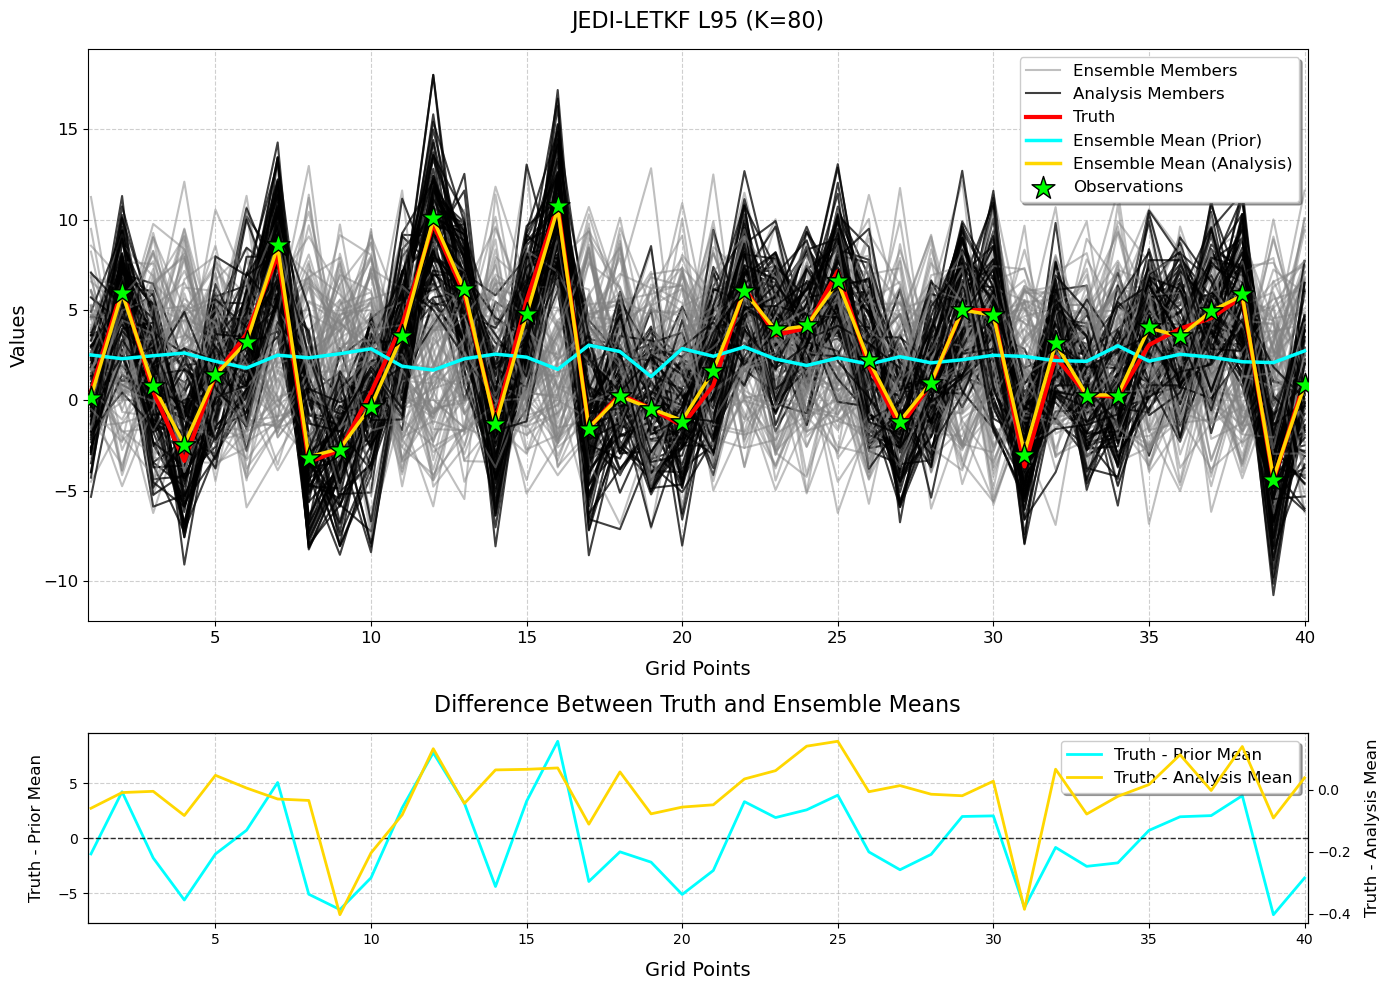

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Data:
num_mem, num_grid_points = u_ens.shape
#print(f"Number of grid points: {num_grid_points}")

# Set up the figure and axes (2 rows: main plot + differences)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# X-axis for grid points
x = np.arange(1, num_grid_points + 1)

# --- First Subplot: Main Plot ---
# Plot ensemble members
for it in range(num_mem):
    ax1.plot(x, u_ens[it, :], color='gray', alpha=0.5, lw=1.5, label='Ensemble Members' if it == 0 else "")  # Add label only once
    ax1.plot(x, u_anl[it, :], color='black', alpha=0.75, lw=1.5, label='Analysis Members' if it == 0 else "")

# Plot truth
ax1.plot(x, u_truth[0, :], color='red', lw=3, label='Truth', zorder=3)

# Plot ensemble prior mean
ax1.plot(x, u_ens.mean(axis=0), color='cyan', lw=2.5, linestyle='-', label='Ensemble Mean (Prior)', zorder=4)

# Plot ensemble analysis mean
ax1.plot(x, u_anl.mean(axis=0), color='gold', lw=2.5, linestyle='-', label='Ensemble Mean (Analysis)', zorder=4)

# Plot observations
ax1.scatter(x, u_obs, marker='*', color='lime', s=300, label='Observations', edgecolor='black', zorder=6)

# Customize the main plot
ax1.set_xlabel('Grid Points', fontsize=14, labelpad=10)
ax1.set_ylabel('Values', fontsize=14, labelpad=10)
ax1.set_title('JEDI-LETKF L95 (K='+str(num_ens)+')', fontsize=16, pad=15)
ax1.set_xlim(0.9, num_grid_points + 0.1)  # Small padding around x-axis
#ax1.set_ylim(u_ens.min() - 1, u_ens.max() + 1)  # Dynamically adjust y-axis to fit the data
ax1.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax1.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Tweak tick parameters
ax1.tick_params(axis='both', labelsize=12)

# --- Second Subplot: Differences ---
truth_minus_anl = u_truth[0, :] - ens_anl_mean
truth_minus_prior = u_truth[0, :] - ens_prior_mean

ax2.plot(x, truth_minus_prior, color='cyan', lw=2, linestyle='-', label='Truth - Prior Mean')

# Secondary y-axis for truth - analysis mean
ax2_sec = ax2.twinx()
ax2_sec.plot(x, truth_minus_anl, color='gold', lw=2, label='Truth - Analysis Mean')



# Customize the differences plot
ax2.set_xlabel('Grid Points', fontsize=14, labelpad=10)
ax2.set_ylabel('Truth - Prior Mean', fontsize=12, labelpad=10)
ax2.set_title('Difference Between Truth and Ensemble Means', fontsize=16, pad=15)
ax2.set_xlim(0.9, num_grid_points + 0.1)
ax2.axhline(0, color='black', linestyle='--', lw=1, alpha=0.8)  # Horizontal reference line
ax2.grid(True, linestyle='--', alpha=0.6)

# Customize the secondary y-axis
ax2_sec.set_ylabel('Truth - Analysis Mean', fontsize=12, labelpad=10)

# Add legends for both y-axes
lines, labels = ax2.get_legend_handles_labels()
lines_sec, labels_sec = ax2_sec.get_legend_handles_labels()
ax2.legend(lines + lines_sec, labels + labels_sec, loc='upper right', fontsize=12, frameon=True, shadow=True)

# Adjust layout and save the figure
plt.tight_layout()
plt.show()
fig.savefig('LETKF_L95_K_'+str(num_ens)+'_oberror_'+str(u_err)+'.png', dpi=300)
